In [15]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

import numpy as np

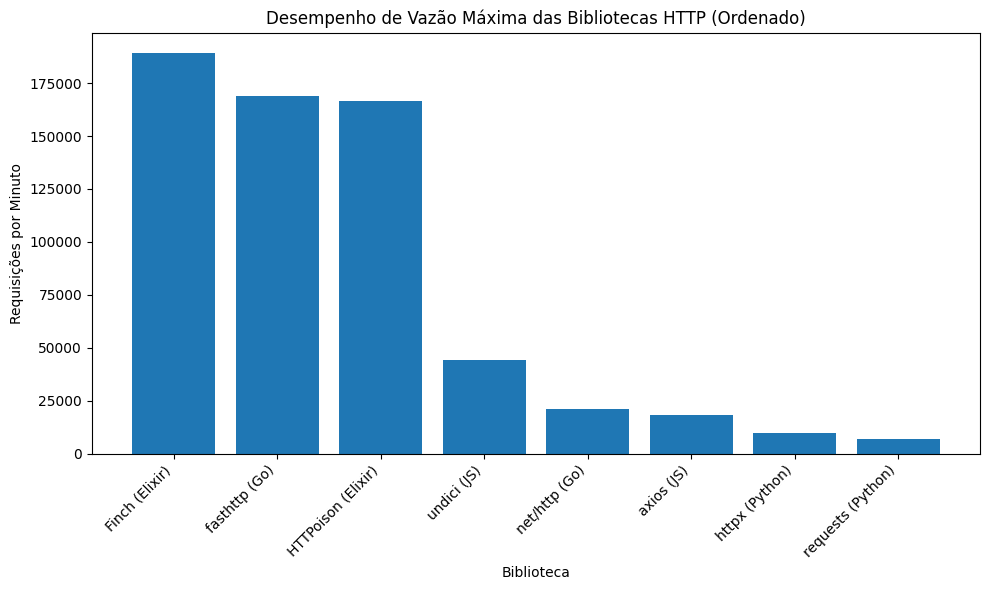

In [16]:
# Data
libraries = [
    "fasthttp (Go)", "net/http (Go)", 
    "Finch (Elixir)", "HTTPoison (Elixir)", 
    "undici (JS)", "axios (JS)", 
    "httpx (Python)", "requests (Python)"
]

requests_per_minute = [
    169091, 21229, 
    189263, 166337, 
    44328, 18171, 
    9794, 7009
]

# Combine and sort by throughput
data = sorted(zip(libraries, requests_per_minute), key=lambda x: x[1], reverse=True)
sorted_libraries, sorted_values = zip(*data)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_libraries, sorted_values)

# Labels and title
plt.xlabel("Biblioteca")
plt.ylabel("Requisições por Minuto")
plt.title("Desempenho de Vazão Máxima das Bibliotecas HTTP (Ordenado)")
plt.xticks(rotation=45, ha="right")

# Show chart
plt.tight_layout()
plt.show()

In [17]:
vazao = {
    "Go_fasthttp": 169091,
    "Go_nethttp": 21229,
    "Elixir_Finch": 189263,
    "Elixir_HTTPoison": 166337,
    "JS_undici": 44328,
    "JS_axios": 18171,
    "Python_httpx": 5770,
    "Python_requests": 5575
}
cpu_cliente = {
    "Go_fasthttp": 80,
    "Go_nethttp": 50,
    "Elixir_Finch": 0,
    "Elixir_HTTPoison": 0,
    "JS_undici": 18,
    "JS_axios": 25,
    "Python_httpx": 0,
    "Python_requests": 29
}
memoria_cliente = {
    "Go_fasthttp": 235.87,
    "Go_nethttp": 3.37,
    "Elixir_Finch": 47.3,
    "Elixir_HTTPoison": 47.3,
    "JS_undici": 96.1,
    "JS_axios": 119.5,
    "Python_httpx": 30.2,
    "Python_requests": 24.5
}
carga_servidor = {
    "Go_fasthttp": 70,
    "Go_nethttp": 65,
    "Elixir_Finch": 60,
    "Elixir_HTTPoison": 58,
    "JS_undici": 55,
    "JS_axios": 50,
    "Python_httpx": 45,
    "Python_requests": 42
}

In [18]:
def normalize(value, max_value, invert=False):
    norm = value / max_value
    return 1 - norm if invert else norm

max_vazao = max(vazao.values())
max_cpu = max(cpu_cliente.values())
max_mem = max(memoria_cliente.values())
max_carga = max(carga_servidor.values())

languages = ["Go_fasthttp", "Go_nethttp", "Elixir_Finch", "Elixir_HTTPoison",
             "JS_undici", "JS_axios", "Python_httpx", "Python_requests"]

metrics_normalized = {}
for lang in languages:
    metrics_normalized[lang] = [
        normalize(vazao[lang], max_vazao),
        normalize(cpu_cliente[lang], max_cpu, invert=True),
        normalize(memoria_cliente[lang], max_mem, invert=True),
        normalize(carga_servidor[lang], max_carga, invert=True)
    ]

# Agregar por linguagem
agg_languages = {
    "Go": ["Go_fasthttp", "Go_nethttp"],
    "Elixir": ["Elixir_Finch", "Elixir_HTTPoison"],
    "JS": ["JS_undici", "JS_axios"],
    "Python": ["Python_httpx", "Python_requests"]
}
metrics_agg = {
    lang: np.mean([metrics_normalized[lib] for lib in libs], axis=0).tolist()
    for lang, libs in agg_languages.items()
}

/tmp/ipykernel_73852/3961233046.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("tab10")  # Use a colormap with distinct colors


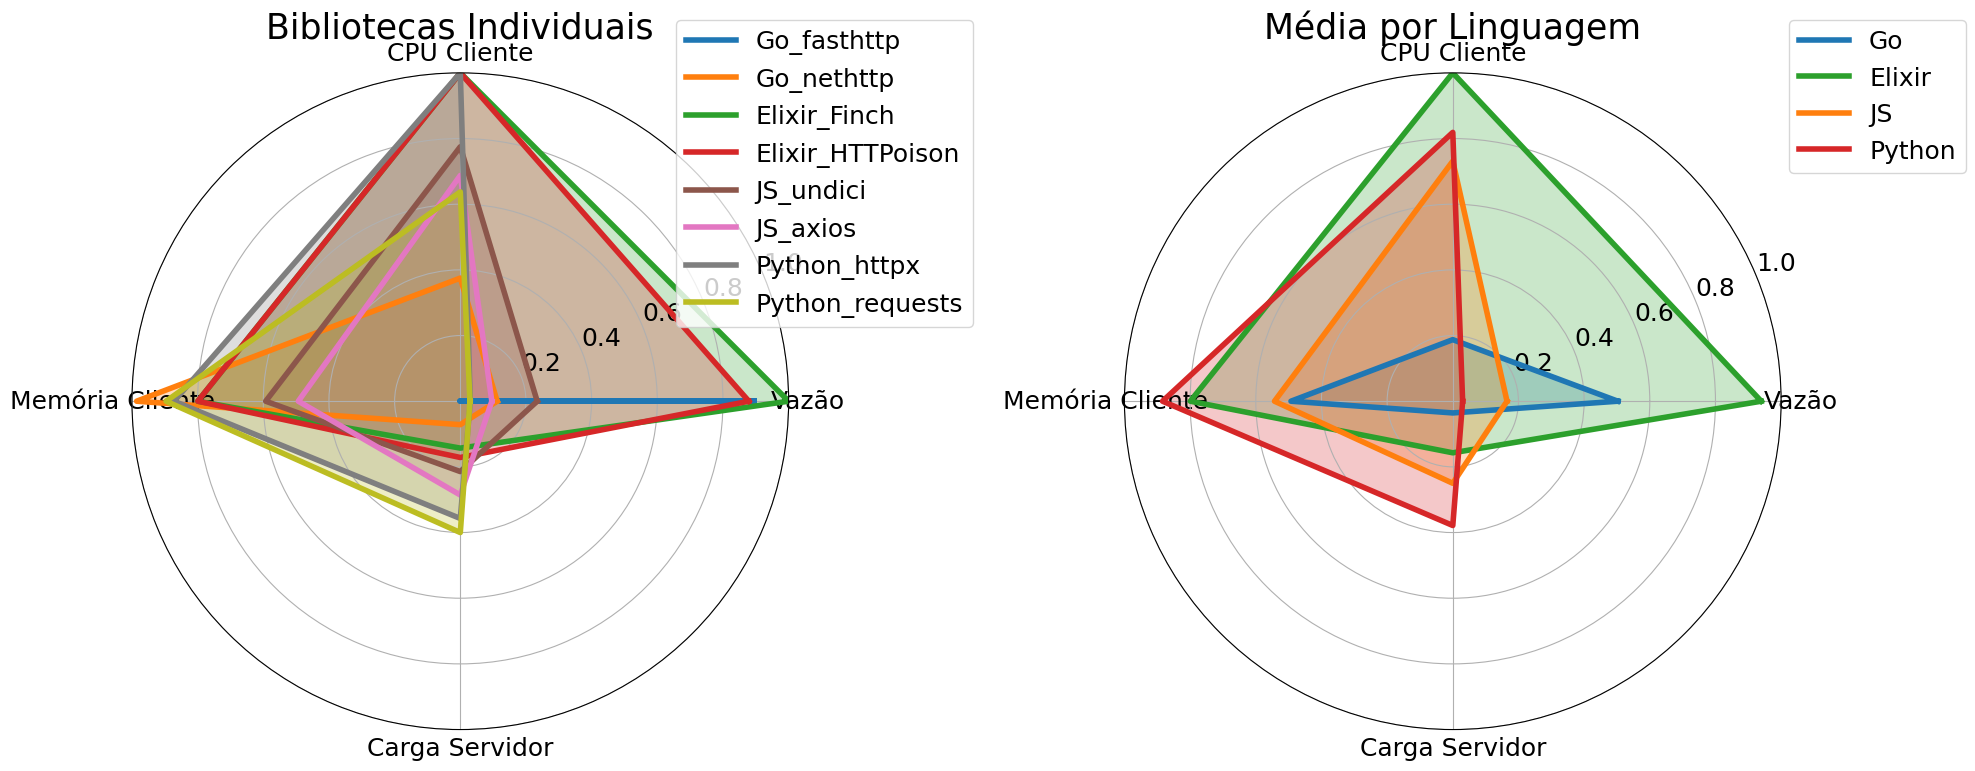

In [29]:
labels = ["Vazão", "CPU Cliente", "Memória Cliente", "Carga Servidor"]
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# Use a colormap for distinct colors
cmap = get_cmap("tab10")  # Use a colormap with distinct colors
library_colors = {
    lib: cmap(i / len(metrics_normalized))
    for i, lib in enumerate(metrics_normalized.keys())
}
# Create figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10), subplot_kw=dict(polar=True))

ax = axes[0] # Radar plot for individual libraries
for lib, values in metrics_normalized.items():
    vals = values + values[:1]
    color = library_colors[lib]
    ax.plot(angles, vals, label=lib, color=color, linewidth=4)
    ax.fill(angles, vals, alpha=0.25, color=color)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=18)  # Increased font size for labels
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(["0.2", "0.4", "0.6", "0.8", "1.0"], fontsize=18)  # Increased font size for y-ticks
ax.set_ylim(0, 1)
ax.set_title("Bibliotecas Individuais", size=25, pad=25)  # Increased title size
ax.legend(fontsize=18, loc='upper right', bbox_to_anchor=(1.3, 1.1))  # Increased legend font size


ax2 = axes[1] # Radar plot for aggregated metrics by language
for lang, values in metrics_agg.items():
    vals = values + values[:1]
    color = colors[lang]
    ax2.plot(angles, vals, label=lang, color=color, linewidth=4)
    ax2.fill(angles, vals, alpha=0.25, color=color)

ax2.set_xticks(angles[:-1])
ax2.set_xticklabels(labels, fontsize=18)  # Increased font size for labels
ax2.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax2.set_yticklabels(["0.2", "0.4", "0.6", "0.8", "1.0"], fontsize=18)  # Increased font size for y-ticks
ax2.set_ylim(0, 1)
ax2.set_title("Média por Linguagem", size=25, pad=25)  # Increased title size
ax2.legend(fontsize=18, loc='upper right', bbox_to_anchor=(1.3, 1.1))  # Increased legend font size

# Adjust layout
plt.tight_layout()
plt.show()